# Multithreading
1. Multithreading is used to perform multiple tasks/ functions simultaneously
2. By the code you write is single threaded -> one task at a time

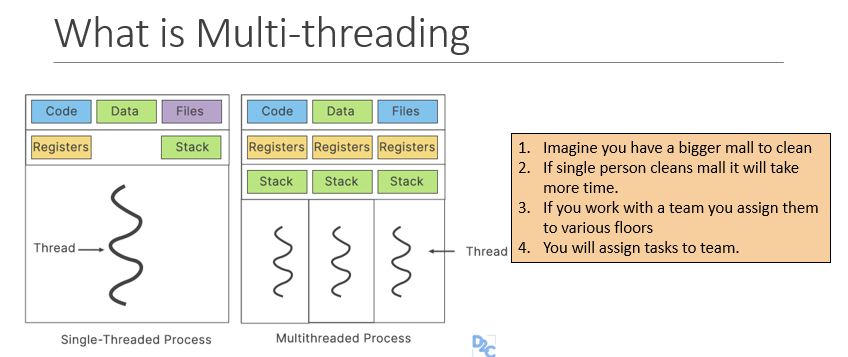

In [1]:
import time

In [2]:
print("Hello!")
time.sleep(2)
print("World")
time.sleep(3)
print("Test")

Hello!
World
Test


In [3]:
import math


def hypotenuse(a, b):
    print("Hypotenuse function started")
    time.sleep(3)
    c = math.sqrt(a**2 + b**2)
    print(f"Hypotenuse of sides {a} and {b} is {c:.4f}")

In [4]:
%%time
hypotenuse(3, 4)

Hypotenuse function started
Hypotenuse of sides 3 and 4 is 5.0000
CPU times: total: 15.6 ms
Wall time: 3 s


In [5]:
%%time
hypotenuse(12, 13)

Hypotenuse function started
Hypotenuse of sides 12 and 13 is 17.6918
CPU times: total: 31.2 ms
Wall time: 3 s


In [7]:
def simple_interest(p, n, r):
    print("Simple Interest function started")
    time.sleep(2)
    i = (p * n * r) / 100
    a = p + i
    print(f"Simple Interest : {i:.2f} INR")
    print(f"Amount : {a:.2f} INR")

In [8]:
%%time
simple_interest(p=50_000, n=5, r=6.5)

Simple Interest function started
Simple Interest : 16250.00 INR
Amount : 66250.00 INR
CPU times: total: 15.6 ms
Wall time: 2.01 s


# Normal Single Threaded execution

In [9]:
%%time
hypotenuse(a=12, b=13) # 3 sec
simple_interest(p=10_000, n=15, r=7.1) # 2 sec

Hypotenuse function started
Hypotenuse of sides 12 and 13 is 17.6918
Simple Interest function started
Simple Interest : 10650.00 INR
Amount : 20650.00 INR
CPU times: total: 0 ns
Wall time: 5.01 s


# Using multithreading to execute two functions simultaneously

In [10]:
from threading import Thread

In [ ]:
%%time
# Create all the threads
th1 = Thread(target=hypotenuse, args=(12, 13))
th2 = Thread(target=simple_interest, args=(12_000, 3, 6.5))

# Start all threads
th1.start()
th2.start()

# Wait for all threads to finish
th1.join()
th2.join()

Hypotenuse function started
Simple Interest function started
Simple Interest : 2340.00 INR
Amount : 14340.00 INR
Hypotenuse of sides 12 and 13 is 17.6918
CPU times: total: 0 ns
Wall time: 3.06 s


# Multithreading on single function but multiple values

In [14]:
def square(n):
    time.sleep(1)
    print(f"Square of number {n} is {n**2}")

In [16]:
%%time
square(23)

Square of number 23 is 529
CPU times: total: 15.6 ms
Wall time: 1 s


In [17]:
def square_list(nums: list[int | float]):
    for i in nums:
        square(i)

In [18]:
a = [12, 13, 14, 16, 18, 20, 23, 112]
type(a)

list

In [19]:
len(a)

8

In [26]:
%%time
square_list(a)

Square of number 12 is 144
Square of number 13 is 169
Square of number 14 is 196
Square of number 16 is 256
Square of number 18 is 324
Square of number 20 is 400
Square of number 23 is 529
Square of number 112 is 12544
CPU times: total: 0 ns
Wall time: 8.03 s


In [22]:
def square_multi(nums: list[int | float]):
    # Create and append all threads
    threads = []
    # Apply for loop on values
    for i in nums:
        th = Thread(target=square, args=(i,))
        th.start()
        threads.append(th)

    # Wait for all threads to finish
    for th in threads:
        th.join()

In [23]:
a

[12, 13, 14, 16, 18, 20, 23, 112]

In [25]:
%%time
square_multi(a)

Square of number 12 is 144
Square of number 13 is 169
Square of number 14 is 196
Square of number 16 is 256
Square of number 18 is 324
Square of number 20 is 400
Square of number 23 is 529
Square of number 112 is 12544
CPU times: total: 0 ns
Wall time: 1.08 s


In [28]:
b = list(range(1, 101))
print(b)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [30]:
%%time
square_multi(b)

Square of number 1 is 1Square of number 3 is 9
Square of number 2 is 4
Square of number 4 is 16
Square of number 6 is 36
Square of number 5 is 25
Square of number 7 is 49
Square of number 8 is 64
Square of number 9 is 81
Square of number 10 is 100
Square of number 12 is 144
Square of number 11 is 121
Square of number 13 is 169
Square of number 14 is 196
Square of number 16 is 256
Square of number 15 is 225
Square of number 18 is 324
Square of number 17 is 289
Square of number 19 is 361
Square of number 20 is 400

Square of number 21 is 441
Square of number 22 is 484
Square of number 24 is 576
Square of number 23 is 529
Square of number 25 is 625
Square of number 26 is 676
Square of number 27 is 729
Square of number 29 is 841
Square of number 28 is 784
Square of number 31 is 961
Square of number 30 is 900
Square of number 33 is 1089
Square of number 32 is 1024
Square of number 35 is 1225
Square of number 34 is 1156
Square of number 37 is 1369
Square of number 36 is 1296
Square of number

# Implementing multithreading on file download

In [31]:
from urllib.request import urlretrieve


def download_single_file(url: str):
    filename = url.split("/")[-1]
    print(f"Downloading {filename} ...")
    urlretrieve(url, filename)
    print(f"{filename} download successful!")

In [32]:
url1 = "https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/data.csv"
print(url1)

https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/data.csv


In [33]:
%%time
download_single_file(url1)

data.csv download successful!
CPU times: total: 297 ms
Wall time: 3.22 s


# Download multiple files singlethreaded

In [34]:
urls = [
    "https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/data.csv",
    "https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/test.csv",
    "https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/train.csv",
]

In [35]:
print(urls)

['https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/data.csv', 'https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/test.csv', 'https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/train.csv']


In [36]:
def download_single_threaded(urls: list[str]):
    for i in urls:
        download_single_file(i)

In [37]:
%%time
download_single_threaded(urls)

data.csv download successful!
test.csv download successful!
train.csv download successful!
CPU times: total: 297 ms
Wall time: 3.54 s


### Download file mulithreaded

In [38]:
def download_multithreaded(urls: list[str]):
    # Create and start all threads
    threads = []
    # Start creating threads
    for i in urls:
        th = Thread(target=download_single_file, args=(i,))
        th.start()
        threads.append(th)

    # Wait for all threads to finish
    for th in threads:
        th.join()

In [39]:
urls

['https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/data.csv',
 'https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/test.csv',
 'https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/train.csv']

In [40]:
%%time
download_multithreaded(urls)

test.csv download successful!
train.csv download successful!
data.csv download successful!
CPU times: total: 406 ms
Wall time: 2.9 s
